## Fit 3D Variogram Functions

The 3D Gaussian variogram function has the following form:

$\gamma = s(1 - e^{-3h^{\top} \Omega h} + 0.06e^{-7.07h^{\top} \Omega h})$

where $\Omega$ is a diagonal matrix with diagonal terms $= [\frac{1}{{r_{lon}}^2}, \frac{1}{{r_{lat}}^2}, \frac{1}{{r_{time}}^2}]$

In [1]:
%load_ext autoreload
%autoreload 2

from ocean_navigation_simulator.generative_error_model.variogram.VariogramFitting import VariogramFitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in 3D variogram data
file_path = "/home/jonas/Downloads/tuned_variogram_2d.csv"
data = pd.read_csv(file_path)
data

,space_lag,t_lag,u_semivariance,v_semivariance
0,10,5,0.113490,0.107545
1,10,10,0.288921,0.261558
2,10,15,0.325907,0.286276
3,10,20,0.331358,0.300079
4,10,25,0.237895,0.217817
...,...,...,...,...
7995,800,480,1.024614,1.034295
7996,800,485,1.015568,1.000842
7997,800,490,1.024810,0.999254
7998,800,495,1.004632,1.017440


In [2]:
fitted_v = VariogramFitting(data, ("space_lag", "t_lag"), error_var="u_semivariance")
fitted_v.fit_model(10, method="least_squares", constrain_weighting=True)

Number of models: 10
Type of model: gaussian_2d
Parameters:
 [[1.01872392e-01 8.51012578e+02 3.70995435e+01]
 [9.77740410e-02 8.30733897e+02 9.32054063e+02]
 [9.97923573e-02 5.39752287e+02 1.77615817e+02]
 [1.01209340e-01 3.26963591e+02 9.57452882e+02]
 [1.06605402e-01 2.94714062e+02 5.47316045e+02]
 [9.85633850e-02 7.59155867e+02 3.00699601e+02]
 [9.97636669e-02 7.60078460e+02 9.12819300e+01]
 [1.13930831e-01 2.53217058e+02 4.44595091e+02]
 [1.80440868e-01 3.36377371e+01 7.01534128e+02]
 [4.77181729e-05 7.27714142e+02 7.94420829e+01]]


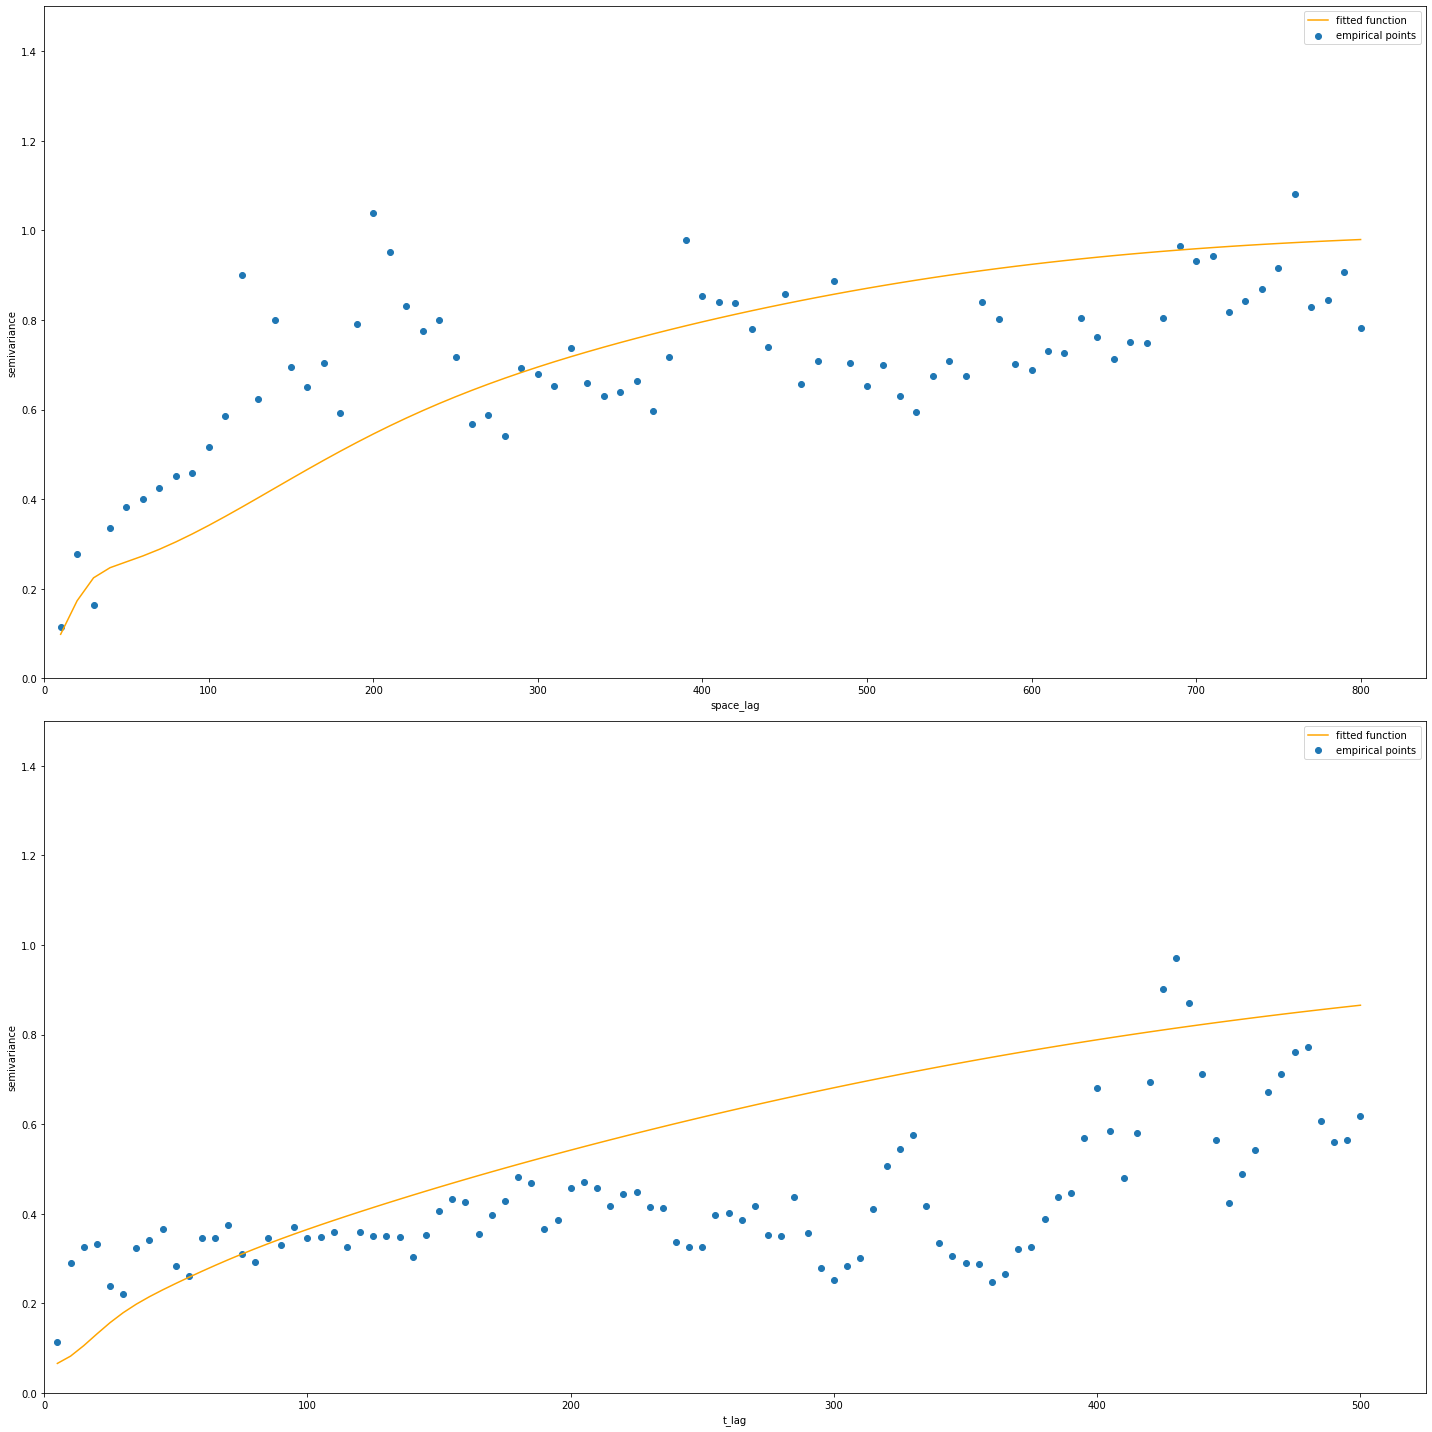

In [3]:
save_path = f"/home/jonas/Downloads/plots/fitted_func.png"
figure = fitted_v.plot_all_dims(save_path=save_path)
